In [1]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd
import csv

In [2]:
D = 145317
K = 500
thetaMatrixFound = False
phiMatrixFound = False
#Matrix of document-topic distribution
thetaMatrix = np.empty(shape=(D,K))
#Matrix of topic-document distribution
phiMatrix = np.empty(shape=(K,D))
counta = 0
countb = 0
with open('sifaka.cs.uiuc.edu/~xwang95/citation_lda/pubmed_citation_lda_500_145317_145317_0.001_0.001_timeCtrl_30_45.lda') as ldaFile:
    for line in ldaFile:
        try:
            if line.startswith('theta'):
                thetaMatrixFound = True
            elif line.startswith('phi'):
                thetaMatrixFound = False
                phiMatrixFound = True
            elif line.startswith('topic_weight'):
                phiMatrixFound = False
            elif thetaMatrixFound == True:
                row = [float(val) for val in line.split(' ')]
                thetaMatrix[counta] = row
                counta=counta+1
            elif phiMatrixFound == True:
                row = [float(val) for val in line.split(' ')]
                phiMatrix[countb] = row
                countb=countb+1
        except ValueError, e:
            print "error",e,"on line", counta
            break

    #Both the matrices are loaded
    print thetaMatrix.shape
    print phiMatrix.shape
    topicDependencyGraph = np.dot(phiMatrix, thetaMatrix)
    print topicDependencyGraph.shape
    print topicDependencyGraph
    

(145317, 500)
(500, 145317)
(500, 500)
[[ 0.02278157  0.00141189  0.00166879 ...,  0.00460414  0.00148401
   0.00148073]
 [ 0.00165881  0.06567776  0.00174865 ...,  0.00162652  0.00161515
   0.00162892]
 [ 0.00094393  0.00091243  0.04753068 ...,  0.00192897  0.00114145
   0.00167325]
 ..., 
 [ 0.00149445  0.00140183  0.00148898 ...,  0.05819698  0.00566984
   0.00155165]
 [ 0.00258464  0.00127073  0.00151823 ...,  0.00132906  0.01013584
   0.00131209]
 [ 0.00127174  0.00129184  0.00152098 ...,  0.00128269  0.00194633
   0.02844764]]


In [3]:
from __future__ import division
count = 0
adjacency_matrix = np.empty(shape=(500,500))
for i in range(0,500):
    for j in range(0,500):
        if topicDependencyGraph[i][j] >= 0.05:
            adjacency_matrix[i][j] = 1
            count+=1
        else:
            adjacency_matrix[i][j] = 0
print count, count/250000
print adjacency_matrix

157 0.000628
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [4]:
len(adjacency_matrix), adjacency_matrix[1][1]

(500, 1.0)

In [5]:
type(adjacency_matrix)

numpy.ndarray

In [6]:
import re
f = open("sifaka.cs.uiuc.edu/~xwang95/citation_lda/pubmed_citation_lda_500_145317_145317_0.001_0.001_timeCtrl_30_45.lda_summary_timeSorted_shortSummary",'r')
dict = {}
count=0
for line in f:
    dict[count] = line.split("\t")
    topic = dict[count][3]
    weight = dict[count][2].split()[0]
    year = dict[count][2].split()[1].split('(')[0]
    std = dict[count][2].split()[1].split('(')[1]
    dict[count][2] = weight
    dict[count][3] = year
    dict[count].append(std)
    dict[count].append(topic)
    #dict[count].append([])
    count+=1
dict

{0: ['[timeSort:0,',
  'Topic: 10]:',
  '0.002699',
  'year=1997.42',
  '16.02)',
  'saccharomyces spindle cerevisiae yeast cell required microtubule microtubules mitotic dynamics protein cycle nuclear migration budding kinesin-related orientation dynein proteins actin \n'],
 1: ['[timeSort:1,',
  'Topic: 1]:',
  '0.002815',
  'year=1997.47',
  '14.31)',
  'golgi protein transport endoplasmic reticulum vesicles membrane vesicle yeast cells copi required copii apparatus fusion human complex er pathway mammalian \n'],
 2: ['[timeSort:2,',
  'Topic: 249]:',
  '0.003506',
  'year=1998.00',
  '13.85)',
  'yeast actin saccharomyces cell cerevisiae protein growth budding myosin gene cytoskeleton assembly required polarized cytokinesis polarity morphogenesis using ring proteins \n'],
 3: ['[timeSort:3,',
  'Topic: 256]:',
  '0.003082',
  'year=1998.38',
  '13.82)',
  'cells dendritic cell factor human antigen interleukin colony-stimulating granulocyte/macrophage presentation class alpha comple

In [7]:
for i in range(0,len(dict)):
    dict[i][0] = re.sub('[\D+]','',dict[i][0])
    dict[i][1] = re.sub('[\D+]','',dict[i][1])
    dict[i][3] = re.sub('[a-zA-Z=]','',dict[i][3])
    dict[i][4] = dict[i][4].strip(')')
    dict[i][5] = dict[i][5].strip('\n')

In [8]:
dict[0][3]

'1997.42'

In [19]:
infl = {}
for j in range(0,500):
    infl[j] = []
    for i in range(0,500):
        if adjacency_matrix[i][j] == 1:
            #df.loc[df.topicNumber==j, 'influencedBy'] = i
            #dict[j][i].append()
            infl[j].append(i)
infl       

{0: [],
 1: [1],
 2: [194],
 3: [3],
 4: [],
 5: [],
 6: [],
 7: [7],
 8: [],
 9: [],
 10: [10],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [17],
 18: [18],
 19: [],
 20: [],
 21: [21],
 22: [],
 23: [],
 24: [24],
 25: [],
 26: [],
 27: [],
 28: [28],
 29: [],
 30: [],
 31: [],
 32: [15, 32],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [38],
 39: [],
 40: [],
 41: [],
 42: [42, 89],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [52],
 53: [53],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [58],
 59: [59, 344],
 60: [60],
 61: [],
 62: [],
 63: [],
 64: [64],
 65: [65],
 66: [320],
 67: [],
 68: [68],
 69: [69],
 70: [],
 71: [71],
 72: [72],
 73: [],
 74: [],
 75: [],
 76: [76],
 77: [],
 78: [],
 79: [],
 80: [],
 81: [81],
 82: [],
 83: [83],
 84: [],
 85: [],
 86: [],
 87: [],
 88: [],
 89: [],
 90: [],
 91: [],
 92: [],
 93: [],
 94: [],
 95: [],
 96: [96],
 97: [],
 98: [32, 98],
 99: [],
 100: [],
 101: [],
 102: [],
 103

In [ ]:
dict = dict

In [10]:
df = pd.DataFrame.from_dict(dict, orient='index')

In [11]:
df.columns = ['timeSorted','topicNumber','weight','year','std','topicTitle','influencedBy']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

In [12]:
df

,0,1,2,3,4,5
0,0,10,0.002699,1997.42,16.02,saccharomyces spindle cerevisiae yeast cell re...
1,1,1,0.002815,1997.47,14.31,golgi protein transport endoplasmic reticulum ...
2,2,249,0.003506,1998.00,13.85,yeast actin saccharomyces cell cerevisiae prot...
3,3,256,0.003082,1998.38,13.82,cells dendritic cell factor human antigen inte...
4,4,425,0.001992,1998.75,18.80,channels channel potassium sodium cell cells h...
5,5,368,0.002313,1999.61,15.75,cells apical polarized membrane health basolat...
6,6,444,0.002877,1999.68,14.42,cell adhesion protein complex beta-catenin cel...
7,7,177,0.002481,1999.73,15.16,yeast protein membrane golgi vacuolar sorting ...
8,8,132,0.002349,1999.83,16.73,tight protein zo-1 junction cells type occludi...
9,9,145,0.001960,2000.07,18.21,keratin cells expression cell class exposure p...


In [20]:
    #print infl[i]
    #df.loc[df.topicNumber == i, "influencedBy"] = infl[i]
df["influencedBy"] = pd.Series(infl)

In [21]:
df

,0,1,2,3,4,5,influencedBy
0,0,10,0.002699,1997.42,16.02,saccharomyces spindle cerevisiae yeast cell re...,[]
1,1,1,0.002815,1997.47,14.31,golgi protein transport endoplasmic reticulum ...,[1]
2,2,249,0.003506,1998.00,13.85,yeast actin saccharomyces cell cerevisiae prot...,[194]
3,3,256,0.003082,1998.38,13.82,cells dendritic cell factor human antigen inte...,[3]
4,4,425,0.001992,1998.75,18.80,channels channel potassium sodium cell cells h...,[]
5,5,368,0.002313,1999.61,15.75,cells apical polarized membrane health basolat...,[]
6,6,444,0.002877,1999.68,14.42,cell adhesion protein complex beta-catenin cel...,[]
7,7,177,0.002481,1999.73,15.16,yeast protein membrane golgi vacuolar sorting ...,[7]
8,8,132,0.002349,1999.83,16.73,tight protein zo-1 junction cells type occludi...,[]
9,9,145,0.001960,2000.07,18.21,keratin cells expression cell class exposure p...,[]


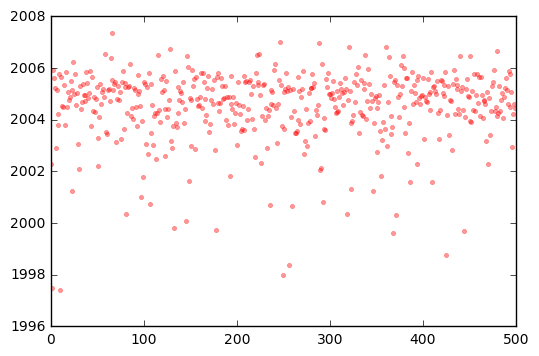

In [13]:
%matplotlib inline
df.year = df.year.astype(float)
df.topicNumber = df.topicNumber.astype(int)
plt.plot(df.topicNumber,df.year,'.r', alpha=0.4)

In [14]:
type(df.year)

pandas.core.series.Series

In [57]:
df.loc['influencedBy',df['topicNumber'] == '484']

KeyError: 'the label [influencedBy] is not in the [index]'

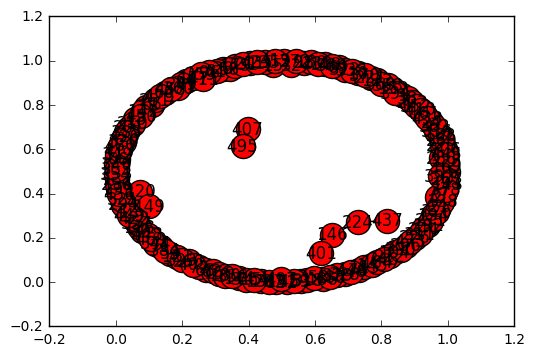

In [16]:
rows, cols = np.where(adjacency_matrix == 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
gr.add_edges_from(edges)
# nx.draw(gr) # edited to include labels
nx.draw_networkx(gr)
# now if you decide you don't want labels because your graph
# is too busy just do: nx.draw_networkx(G,with_labels=False)
plt.show() 


In [76]:
infl

{}

In [87]:
df

,timeSorted,topicNumber,weight,year,std,topicTitle,influencedBy
0,0,10,0.002699,1997.42,16.02,saccharomyces spindle cerevisiae yeast cell re...,[]
1,1,1,0.002815,1997.47,14.31,golgi protein transport endoplasmic reticulum ...,[]
2,2,249,0.003506,1998.00,13.85,yeast actin saccharomyces cell cerevisiae prot...,[]
3,3,256,0.003082,1998.38,13.82,cells dendritic cell factor human antigen inte...,[]
4,4,425,0.001992,1998.75,18.80,channels channel potassium sodium cell cells h...,[]
5,5,368,0.002313,1999.61,15.75,cells apical polarized membrane health basolat...,[]
6,6,444,0.002877,1999.68,14.42,cell adhesion protein complex beta-catenin cel...,[]
7,7,177,0.002481,1999.73,15.16,yeast protein membrane golgi vacuolar sorting ...,[]
8,8,132,0.002349,1999.83,16.73,tight protein zo-1 junction cells type occludi...,[]
9,9,145,0.001960,2000.07,18.21,keratin cells expression cell class exposure p...,[]


In [26]:
df.to_json("data.json",orient="records")

In [23]:
type(dfjson)

str

In [24]:
dfjson

'[{"0":"0","1":"10","2":"0.002699","3":"1997.42","4":"16.02","5":"saccharomyces spindle cerevisiae yeast cell required microtubule microtubules mitotic dynamics protein cycle nuclear migration budding kinesin-related orientation dynein proteins actin ","influencedBy":[]},{"0":"1","1":"1","2":"0.002815","3":"1997.47","4":"14.31","5":"golgi protein transport endoplasmic reticulum vesicles membrane vesicle yeast cells copi required copii apparatus fusion human complex er pathway mammalian ","influencedBy":[1]},{"0":"2","1":"249","2":"0.003506","3":"1998.00","4":"13.85","5":"yeast actin saccharomyces cell cerevisiae protein growth budding myosin gene cytoskeleton assembly required polarized cytokinesis polarity morphogenesis using ring proteins ","influencedBy":[194]},{"0":"3","1":"256","2":"0.003082","3":"1998.38","4":"13.82","5":"cells dendritic cell factor human antigen interleukin colony-stimulating granulocyte\\/macrophage presentation class alpha complex tumor mouse major receptor hi